Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [x] Look at the data. Choose a feature, and plot its relationship with the target.
- [x] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [x] Define a function to make new predictions and explain the model coefficient.
- [x] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [x] Do linear regression with two or more features.
- [x] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

# Assignment

## Model using Bedroom Number

### Wrangle Data

In [16]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '/Users/keila/Documents/Lambda/Units_Git/DS-Unit-2-Linear-Models/data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [17]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [18]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [19]:
# Take a look at what some of the data looks like
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,...,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,...,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Let's see if there are any missing values and the dtype of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48818 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48818 non-null  float64
 1   bedrooms              48818 non-null  int64  
 2   created               48818 non-null  object 
 3   description           47393 non-null  object 
 4   display_address       48685 non-null  object 
 5   latitude              48818 non-null  float64
 6   longitude             48818 non-null  float64
 7   price                 48818 non-null  int64  
 8   street_address        48808 non-null  object 
 9   interest_level        48818 non-null  object 
 10  elevator              48818 non-null  int64  
 11  cats_allowed          48818 non-null  int64  
 12  hardwood_floors       48818 non-null  int64  
 13  dogs_allowed          48818 non-null  int64  
 14  doorman               48818 non-null  int64  
 15  dishwasher         

In [21]:
# There are a few null values. I want to drop those, set the index to creation time of entry,
# and only keep the features I will be using.

def wrangle(df):
    df.dropna(inplace = True)
    df.set_index(['created'], inplace = True)
    df = df[['price','bathrooms', 'bedrooms', 'dishwasher', 'longitude', 'latitude', 'laundry_in_unit']]
    return df

In [22]:
# Apply the function to df
df = wrangle(df)

# Let's take a look at what df looks like now
df.head()

# Want to double check shape of df
print(df.shape)

,price,bathrooms,bedrooms,dishwasher,longitude,latitude,laundry_in_unit
created,,,,,,,
2016-06-24 07:54:24,3000,1.5,3,0,-73.9425,40.7145,0
2016-06-12 12:19:27,5465,1.0,2,0,-73.9667,40.7947,0
2016-04-17 03:26:41,2850,1.0,1,1,-74.0018,40.7388,0
2016-04-18 02:22:02,3275,1.0,1,0,-73.9677,40.7539,0
2016-04-28 01:32:41,3350,1.0,4,0,-73.9493,40.8241,0


### Split Data

In [23]:
# Arrange X features matrix & y target vector
X = df[['bedrooms']]
y = df['price']

### Establish Baseline

In [24]:
# Import the needed estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Set up my baseline
print('Mean rent price:', y.mean())
y_pred = [y.mean()] * len(y)

print('Baseline MAE:', mean_absolute_error(y, y_pred))

Mean rent price: 3578.0165040942848
Baseline MAE: 1203.1825021400039


### Build Model

In [25]:
# Instantiate class
model = LinearRegression()

# Fit model
model.fit(X, y)

LinearRegression()

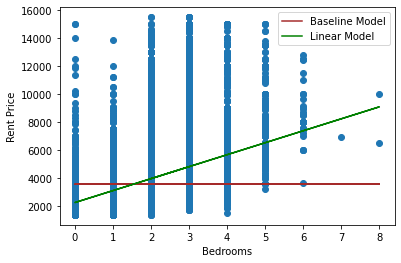

In [26]:
# import matplotlib.pylot
import matplotlib.pyplot as plt

# visualize model
plt.scatter(df['bedrooms'], df['price'])
plt.plot(df['bedrooms'], y_pred, label = 'Baseline Model', color = 'brown')
plt.plot(X, model.predict(X), label = 'Linear Model', color = 'green')
plt.xlabel('Bedrooms')
plt.ylabel('Rent Price')
plt.legend()

plt.show()

### Check Metrics

In [27]:
# look at MAE using the model
print('Training MAE:', mean_absolute_error(y, model.predict(X)))

Training MAE: 973.2377536991468


### Communicate Results

In [28]:
# write a function to communicate results of model
def predictions(bedroom_num):
    y_pred = model.predict([[bedroom_num]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    result = f'When predicting the rent for a {bedroom_num} bedroom apartment our model estimates the rent will be ${estimate:,.2f}.'
    explanation = f'Each additional bedroom adds ${coefficient:,.2f} to the rent.'
    return result + '\n' + explanation


In [29]:
# test out function
print(predictions(10))

When predicting the rent for a 10 bedroom apartment our model estimates the rent will be $10,806.66.
Each additional bedroom adds $854.86 to the rent.


In [30]:
# test out function again
print(predictions(2))

When predicting the rent for a 2 bedroom apartment our model estimates the rent will be $3,967.81.
Each additional bedroom adds $854.86 to the rent.


## Model using Appliances in Unit

### Wrangle Data 

In [31]:
# create new feature to see if appliance number can be used to estimate rent
df['appliances_in_unit'] = df['dishwasher'] + df['laundry_in_unit']

#take a look at new feature I made
df.head()

,price,bathrooms,bedrooms,dishwasher,longitude,latitude,laundry_in_unit,appliances_in_unit
created,,,,,,,,
2016-06-24 07:54:24,3000,1.5,3,0,-73.9425,40.7145,0,0
2016-06-12 12:19:27,5465,1.0,2,0,-73.9667,40.7947,0,0
2016-04-17 03:26:41,2850,1.0,1,1,-74.0018,40.7388,0,1
2016-04-18 02:22:02,3275,1.0,1,0,-73.9677,40.7539,0,0
2016-04-28 01:32:41,3350,1.0,4,0,-73.9493,40.8241,0,0


### Split Data

In [37]:
# Arrange X features matrix & y target vector for second model
X2 = df[['appliances_in_unit']]
y2 = df['price']

### Establish Baseline

In [38]:
# set the baseline up again (same as one above, just nice to have it here for quick reference)

print('Mean Rent Price:', y2.mean())
y2_pred = [y2.mean()]*len(y2)

print('Baseline MAE:', mean_absolute_error(y2, y2_pred))

Mean Rent Price: 3578.0165040942848
Baseline MAE: 1203.1825021400039


### Build Model

In [39]:
# Instantiate class
model2 = LinearRegression()

# Fit new model
model2.fit(X2, y2)

LinearRegression()

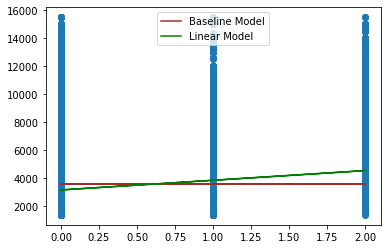

In [40]:
# visualize the new model
plt.scatter(df['appliances_in_unit'], df['price'])
plt.plot(df['appliances_in_unit'], y2_pred, label = 'Baseline Model', color = 'brown')
plt.plot(X2, model2.predict(X2), label = 'Linear Model', color = 'green')
plt.legend()

plt.show()

### Check Metrics

In [41]:
# look at MAE using the new model
print('Training MAE:', mean_absolute_error(y2, model.predict(X2)))

Training MAE: 1166.4544241193316


### Communicate Results

In [42]:
# write a function that estimates rent with appliance number
def predictions2(appliance_num):
    y_pred = model2.predict([[appliance_num]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    result = f'When predicting the rent for an apartment with {appliance_num} appliances, our model estimates the rent will be ${estimate:,.2f}.'
    explanation = f'Each additional appliance adds ${coefficient:,.2f} to the rent.'
    return result + '\n' + explanation

In [43]:
# test out new function
print(predictions2(1))

When predicting the rent for an apartment with 1 appliances, our model estimates the rent will be $3,851.10.
Each additional appliance adds $854.86 to the rent.


# Stretch

### Split Data

In [41]:
# Arrange X features matrix & y target vector for linear regression with 2 features
X3 = df[['longitude', 'latitude']]
y3 = df['price']

### Set Baseline

In [52]:
# Again, the baseline is same as above, writing it up again for reference
print('Mean rent price:', y.mean())
y3_pred = [y3.mean()] * len(y3)

print('Baseline MAE:', mean_absolute_error(y3, y3_pred))

Mean rent price: 3579.5609816051456
Baseline MAE: 1201.5251847945751


### Build Model

In [53]:
# instantiate class
model3 = LinearRegression()


# fit model
model3.fit(X3, y3)

LinearRegression()

### Check Metrics

In [55]:
# look at MAE using 2 feature model
print('Training MAE:', mean_absolute_error(y2, model2.predict(X2)))

Training MAE: 1146.5318150026005
